# Andrew Ng's Machine Learning MOOC: Week 3: Logistic Regression

# Programming Exercise 2

## 0. Introduction
This notebook contains my solutions to the programming exercise for week 3 of Andrew Ng's famous Machine Learning MOOC on Coursera (https://www.coursera.org/learn/machine-learning). 

Remember, despite the name, logistic "*regression*" is a *classification* algorithm, and a sub-set of *supervised learning*. It takes labelled data, where the labels denote whether the data belong to one class or another. It then fits a model that predicts which class a data point - or, more usefully, *new data points* - belong to.

In this exercise, we are asked to implement logistic regression and apply it to two different datasets.

Now, the course requires submission of programming exercises in either the MATLAB or OCTAVE programming language.

However since:
* I already code in Python for various web development and data science projects, and
* Python is the pre-eminent language currently used in data science and machine learning (and MATLAB and OCTAVE don't seem to be used anywhere near as much)

I decided it would be more valuable to me to use Python to complete the programming exercises.

I was therefore very pleased to find the following source, which has kindly written a set of python scripts to allow one to create Python implementations of the programming exercises for the course, and still submit them for scoring by the MOOC:
https://github.com/dibgerge/ml-coursera-python-assignments

**Thanks very much <i>dibgerge!</i>**


In addition to the course's own lecture materials, I also used a number of other sources to help me solve the programming exercises. These include:
### Other courses I've completed:
* Harvard's Using Python for Research on edX: https://www.edx.org/course/using-python-for-research
* UC San Diego's Python for Data Science, also on edX: https://www.edx.org/course/python-for-data-science-2
* MIT's Introduction to Computational Thinking and Data Science I and II, also on edX: https://www.edx.org/course/introduction-to-computational-thinking-and-data-4
* Imperial College London's Mathematics for Machine Learning I-III on Coursera: https://www.coursera.org/specializations/mathematics-machine-learning

### Books:
* Python Machine Learning by Sebastian Raschka and Vahid Mirjalili: https://sebastianraschka.com/books.html


### Blogs and websites
I found this blog a very useful reference:
* https://www.johnwittenauer.net/machine-learning-exercises-in-python-part-3/

And of course, there's always StackOverflow!

One thing that struck me, looking at all of these different resources, is how many different ways there are to implement basically the same code in python, even using numpy and pandas dataframes! And that's before we think about object-oriented implementations, or using libraries such as scikitlearn.

OK, now that the introduction is complete, let's get started with some imports.
You can find instructions on how to install required libraries in the README file in *dibgerge*'s  [github repository](https://github.com/dibgerge/ml-coursera-python-assignments).

In [1]:
# used for manipulating directory paths
import os

# Scientific and vector computation for python
import numpy as np

# pandas dataframe library for python
import pandas as pd

# Plotting library
from matplotlib import pyplot as plt

# Optimization module in scipy
from scipy import optimize

# scikitlearn machine learning library - various modules
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# library written for this exercise providing additional functions for assignment submission, and others
import utils

# define the submission/grader object for this exercise
grader = utils.Grader()

# tells matplotlib to embed plots within the notebook
%matplotlib inline

## 1 Logistic Regression

In this part of the exercise, we are asked to build a logistic regression model to predict whether a student gets admitted into a university. Suppose that you are the administrator of a university department and
you want to determine each applicant’s chance of admission based on their results on two exams. You have historical data from previous applicants that you can use as a training set for logistic regression. For each training example, you have the applicant’s scores on two exams and the admissions decision.

Your task is to build a classification model that estimates an applicant’s probability of admission based the scores from those two exams. 

The following cell will load the data and corresponding labels:

In [2]:
# Load data. I'm going to load the data into a pandas dataframe
# The first two columns contains the exam scores and the third column
# contains the label.
data = pd.read_csv(os.path.join('Data', 'ex2data1.txt'), sep=",", header=None, names=["Score1", "Score2", "Label"])

First, let's take a look at the data:

In [3]:
data.head()

,Score1,Score2,Label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
data.describe()

,Score1,Score2,Label
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [5]:
data["Score1"].isnull().sum()

0

In [6]:
data["Score2"].isnull().sum()

0

In [7]:
data["Label"].isnull().sum()

0

From this quick look at the data we see:
* We have 100 data points
* There are no null values
* *Score1* and *Score2* are floats in the range of ~30.0 to ~100
* *Label* is an int - 0 or 1

### 1.1 Visualizing the data

Before starting to implement any learning algorithm, it is always good to visualize the data if possible. This week's programming exercises asks us to define a function `plotData`,  which will create a 2-dimensional display containing a figure where the axes are the two exam scores, and the positive and negative examples are shown with different markers. **NB** this is an optional (i.e. ungraded) exercise.

Now, normally I'd just define `plotData` to work straight on the pandas dataframe I've created. However, because of the way this tutorial has been implemented, we need to extract the data into two separate numpy arrays - we can't work directly with the dataframe. That's a little annoying - but on the other hand *dibgerge* has kindly pulled together this entire python version and saved us from having to learn Octave or Matlab - so let's be grateful, eh!!

Below we extract the two numpy arrays from the dataframe:

In [8]:
X = data.iloc[:,0:2].values
y = data.iloc[:,2].values

In [9]:
X.shape

(100, 2)

In [10]:
y.shape

(100,)

#### 1.1.1 Defining `plotData()`

In [11]:
def plotData(X, y):
    """
    Plots the data points X and y into a new figure. Plots the data 
    points with a blue 'o' for the positive examples and a red 'x' for the negative examples.
    
    Parameters
    ----------
    X : array_like
        An Mx2 matrix representing the dataset. 
    
    y : array_like
        Label values for the dataset. A vector of size (M, ).
    
    Instructions
    ------------
    Plot the positive and negative examples on a 2D plot, using a
    blue circle ['o'] 'for the positive examples and a red x ['x'] for the negative examples.    
    """
    # instantiate figure and subplot
    fig, ax = plt.subplots(figsize = (15, 10))
    
    # extract the data with Label == 0 and Label == 1
    # ...first find the indices of Positive and Negative data points
    pos = y == 1
    neg = y == 0
    
    # plot the data onto the ax
    ax.scatter(X[pos, 0], X[pos, 1], alpha = 0.7, marker = "o", color="blue", edgecolor="white", label="Admitted")
    ax.scatter(X[neg, 0], X[neg, 1], alpha = 0.7, marker = "x", color="red", edgecolor="white", label="Not Admitted")
    
    # add axis labels
    # ax.set_title("Scores on Exam 1 and Exam 2 for Admitted and Not-Admitted Students", fontsize = 16)
    ax.set_xlabel("Exam 1 score", fontsize = 14)
    ax.set_ylabel("Exam 2 score", fontsize = 14)
    
    # add legend
    plt.legend()
    
    # option to save the figure
    # plt.savefig("filename.png")
    
    # return fig, ax
    return fig, ax

Now, we call the implemented function to display the loaded data:

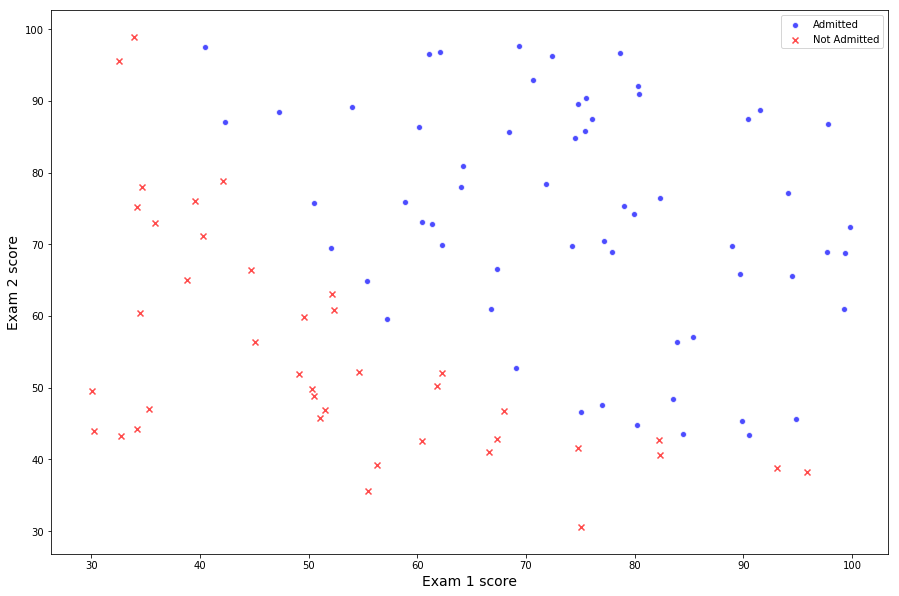

In [12]:
plotData(X, y)

# show the figure inline
plt.show()

#### 1.1.2 Alt. take: defining `plotData()` so that it works directly from the dataframe
I said above that normally I'd just plot the data straight from the pandas dataframe. So, for practice and fun, I'm going to define a function `plotData2` that will re-create the same chart as I've got above, except that input is a dataframe rather than two numpy arrays.

In [13]:
def plotData2(df):
    """
    Plots the data points representing scores on Exam 1 and Exam 2, and whether applicants were successful
    or not, into a new figure. Plots the data points with a blue 'o' for the positive examples
    and a red 'x' for the negative examples.
    
    Parameters
    ----------
    df : pandas dataframe with M x 3 columns, representing the dataset
    
    
    Returns
    ------------
    fig - a matplotlib figure
    ax - matplotlib axes
    """
    # instantiate figure and subplot
    fig, ax = plt.subplots(figsize = (15, 10))
    
    # define the Positive and Negative data points
    positives = data[data.Label == 1]
    negatives = data[data.Label == 0]
    
    # plot the data onto the ax
    ax.scatter(positives.Score1, positives.Score2, alpha = 0.7, marker = "o", color="blue", edgecolor="white", label="Admitted")
    ax.scatter(negatives.Score1, negatives.Score2, alpha = 0.7, marker = "x", color="red", edgecolor="white", label="Not Admitted")
    
    # add axis labels
    ax.set_title("Scores on Exam 1 and Exam 2 for Admitted and Not-Admitted Students", fontsize = 16)
    ax.set_xlabel("Exam 1 score", fontsize = 14)
    ax.set_ylabel("Exam 2 score", fontsize = 14)
    
    # add legend
    plt.legend()
    
    # option to save the figure
    # plt.savefig("filename.png")
    
    # return fig, ax
    return fig, ax

Now, we call the new (revised) function to display the loaded data:

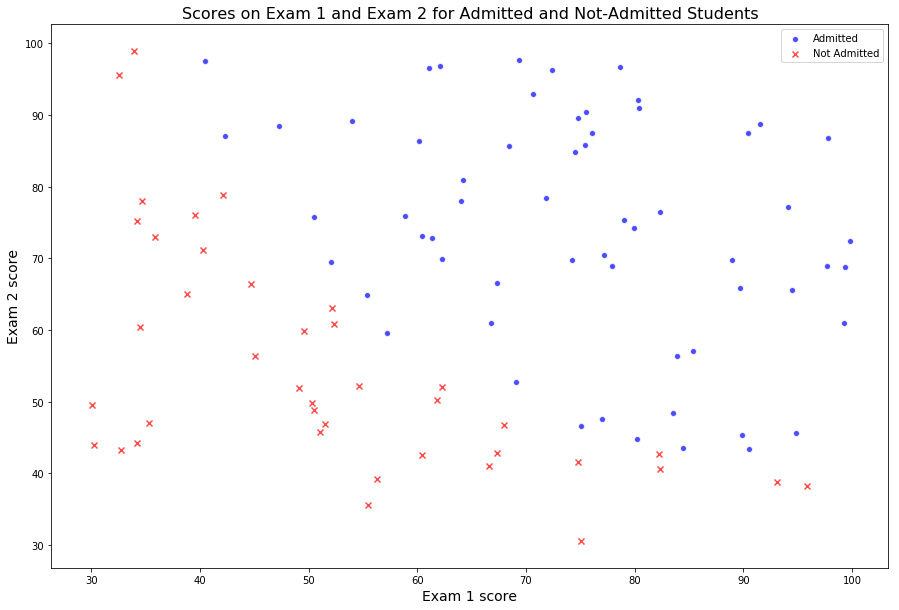

In [14]:
plotData2(data)

# show the figure inline
plt.show()

Looks good!

<a id="section1"></a>
### 1.2 Implementation

#### 1.2.1 Warmup exercise: sigmoid function

Before we start with the actual cost function, recall that the logistic regression hypothesis is defined as:

$$ h_\theta(x) = g(\theta^T x)$$

where function $g$ is the sigmoid function. The sigmoid function is defined as: 

$$g(z) = \frac{1}{1+e^{-z}}$$

The first step in the exercise is to implement a function `sigmoid()` so it can be called by the rest of our programme.

**NB** that the code should also work with vectors and matrices. **For a matrix, your function should perform the sigmoid function on every element.**
<a id="sigmoid"></a>

In [15]:
def sigmoid(z):
    """
    Computes the sigmoid of each value of the input z (z can be a matrix, vector or scalar).
    
    Parameters
    ----------
    z : array_like
        The input to the sigmoid function. This can be a 1-D vector 
        or a 2-D matrix. 
    
    Returns
    -------
    g : array_like
        The computed sigmoid function. g has the same shape as z, since
        the sigmoid is computed element-wise on z.
    
    """
    # convert input to a numpy array
    z = np.array(z)
    
    # instantiate the output, g, to be an array of the same shape as the input, z
    g = np.zeros(z.shape)
    
    # define g as the sigmoid function
    g = 1.0 / (1.0 + np.exp(-z))
    
    # return g
    return g

It's worth taking a little time to understand what the sigmoid function is actually doing.

First of all, let's plot it:

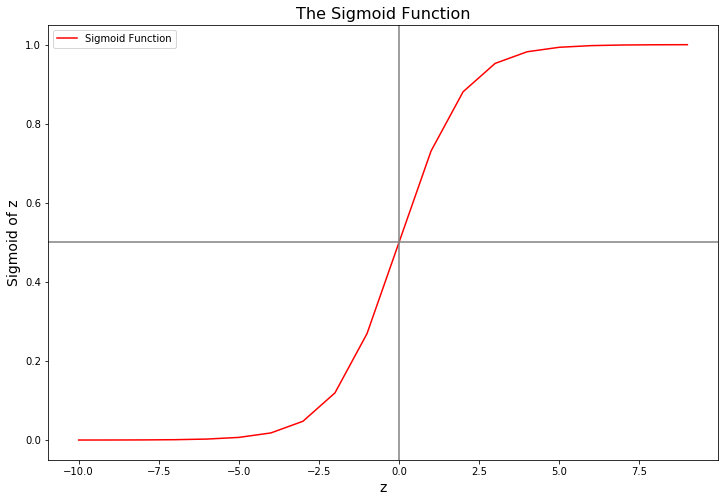

In [16]:
# set a range for which we want to plot 'z' vs. the sigmoid of 'z'
# ...here we choose a range from -10 to 10 in steps of 1
nums = np.arange(-10, 10, step=1)

# define our figure and axis
fig, ax = plt.subplots(figsize=(12,8))

# plot the sigmoid function
ax.plot(nums, sigmoid(nums), 'r', label = "Sigmoid Function")

# add some lines to highlight how the activation function changes aroud 0
plt.axvline(x = 0, color = 'grey')
plt.axhline(y = 0.5, color = 'grey')

# add axis labels
ax.set_title("The Sigmoid Function", fontsize = 16)
ax.set_xlabel("z", fontsize = 14)
ax.set_ylabel("Sigmoid of z", fontsize = 14)
ax.legend()

# show the plot inline
plt.show()

Looking at this, we can see that the sigmoid function converts a continuous input into a value between zero and one. Large negative values of *z* return a value of 0, while large positive values return 1. We interpret this output as the class probability, or the likelihood that the input example should be classified positively. Using this probability along with a threshold value, we can obtain a discrete label prediction. The threshold rule applied is:
* If sigmoid(z) is >= 0.5 (i.e. 50% or above), classify *z* as belonging to class 1
* If sigmoid(z) is < 0.5 (i.e. below 50%), classify *z* as belonging to class 0

We can now test a few values by calling `sigmoid(x)` in a new cell.
* For large positive values of `x`, the sigmoid should be close to 1
* For large negative values, the sigmoid should be close to 0
* Evaluating `sigmoid(0)` should give us exactly 0.5

In [17]:
# Test the implementation of the sigmoid function on a range of cases
testCases = [-100, -10, 0, 10, 100]
for testCase in testCases:
    g = sigmoid(testCase)
    print("g({}) = {}".format(testCase, g))

g(-100) = 3.7200759760208356e-44
g(-10) = 4.5397868702434395e-05
g(0) = 0.5
g(10) = 0.9999546021312976
g(100) = 1.0


Those results look like what we would expect - and indeed, doing the calculations "manually" (e.g. on a calculator or in MS Excel) does give us the same results.

We should also check that our sigmoid function also works on vectors and matrices. So let's run a couple more test cases:

In [18]:
testCase2 = np.array([[-100, -10, 0],[0, 10, 100]])
sigmoid(testCase2)

array([[  3.72007598e-44,   4.53978687e-05,   5.00000000e-01],
       [  5.00000000e-01,   9.99954602e-01,   1.00000000e+00]])

In [19]:
testCase3 = np.array([-100, -10, 0, 10, 100])
sigmoid(testCase3)

array([  3.72007598e-44,   4.53978687e-05,   5.00000000e-01,
         9.99954602e-01,   1.00000000e+00])

**Great!**

Our `sigmoid()` function works on scalars, vectors and matrices.

<a id="section2"></a>
#### 1.2.2 Cost function and gradient

The next part of the programming exercise is to implement the cost function and gradient for logistic regression. The first step here is to add the intercept term $\theta_0$ to X (the matrix of features - in this case scores on Exam 1 and Exam 2).

Now, in *dibgerge's* solution, we need to be using numpy arrays as the inputs to our functions - because that's how he's written the grader that we can use for the course (and, probably, how AndrewNg and the team at Stanford/Coursera have set up their own grading and test cases). As a result, his solution is as below:

In [20]:
# Setup the data matrix appropriately, and add ones for the intercept term
m, n = X.shape

# Add intercept term to X
X = np.concatenate([np.ones((m, 1)), X], axis=1)

However, as you know, I'm keen to use pandas dataframes as far as possible. So instead I'm going to do the following:
* Add a column of 0s to the beginning of my dataframe, `data`
* Extract out the relevant columns into numpy arrays which we can use with the grader that *dibgerge* has so helpfully written for us

**<span style="color:red">NOTE</span>** - only do this ONCE - otherwise you'll have to re-load the data

**NOTE2** - be careful here to inser a float 1.0, not a string '1.0'!

In [21]:
# insert a leading column, called "Theta_0", containing values 1.0
data.insert(0, 'Theta_0', 1.0)

In [22]:
data.head()

,Theta_0,Score1,Score2,Label
0,1.0,34.623660,78.024693,0
1,1.0,30.286711,43.894998,0
2,1.0,35.847409,72.902198,0
3,1.0,60.182599,86.308552,1
4,1.0,79.032736,75.344376,1


In [23]:
# extract the first three columns of the adapted dataframe to be our new feature-matrix, X
# use "iloc" to extract all rows, columns 0 - 3 **exclusive**
cols = data.shape[1]
X = data.iloc[:,0:cols-1].values

In [24]:
X.shape

(100, 3)

In [25]:
X.shape[0]

100

In [26]:
X.shape[1]

3

Now we complete the code for the function `costFunction()` to return the cost and gradient. Recall that the cost function in logistic regression is:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left[ -y^{(i)} \log\left(h_\theta\left( x^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - h_\theta\left( x^{(i)} \right) \right) \right]$$

and the gradient of the cost is a vector of the same length as $\theta$ where the $j^{th}$ element (for $j = 0, 1, \cdots , n$) is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left( x^{(i)} \right) - y^{(i)} \right) x_j^{(i)} $$

Note that while this gradient looks identical to the linear regression gradient, the formula is actually different because linear and logistic regression have different definitions of $h_\theta(x)$.
<a id="costFunction"></a>

In [27]:
def costFunction(theta, X, y):
    """
    Compute cost and gradient for logistic regression. 
    
    Parameters
    ----------
    theta : array_like
        The parameters for logistic regression. This a vector
        of shape (n, ), where n is the number of features in our feature-matrix X.
        *NB* we assume the intercept (theta_0) term has *already been added* to X
    
    X : array_like
        The input dataset of shape (m x n) where m is the total number
        of data points, and n is the number of features in our feature-matrix X.
        *NB* we assume the intercept (theta_0) term has *already been added* to X
    
    y : array_like
        Labels for the input. This is a vector of shape (m, ).
    
    Returns
    -------
    J : float
        The computed value for the cost function. 
    
    grad : array_like
        A vector of shape (n, ) where n is the number of features in our feature-matrix X.
        *NB* we assume the intercept (theta_0) term has *already been added* to X
        Represents the gradient of the cost function with respect to theta, at the current values of theta.
        
    Instructions
    ------------
    Compute the cost of a particular choice of theta. You should set J to 
    the cost. Compute the partial derivatives and set grad to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # initialize some useful values
    m = X.shape[0] # number of training examples
    n = X.shape[1] # number of features *including leading 1s - i.e. the intercept* 

    # instantiate initial values of J and grad
    J = 0
    grad = np.zeros(theta.shape)
    
    # calculate the value of J at each step
    net_input = np.dot(X, theta)
    y_hat = sigmoid(net_input)
    J_term1 = -y.dot(np.log(y_hat))
    J_term2 = (1-y).dot(np.log(1-y_hat))
    J = np.sum(J_term1 - J_term2)/m

    # calculate [the values of] grad at each step
    error = y_hat - y
    for i in range(theta.shape[0]):
        term = np.multiply(error, X[:,i])
        grad[i] = np.sum(term) / len(X)
    
    # return J and grad
    return J, grad

Let's now call `costFunction()` using two test cases for  $\theta$.

In the first case, we initialize $\theta$ to be an array of 0s:

In [28]:
# Initialize fitting parameters
n = X.shape[1]
initial_theta = np.zeros(n)

Before we go any further, let's check we've got the right shapes for our different inputs:

In [29]:
X.shape, y.shape, initial_theta.shape

((100, 3), (100,), (3,))

Now let's test out `costFunction()`:

In [30]:
cost, grad = costFunction(initial_theta, X, y)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx): 0.693\n')

print('Gradient at initial theta (zeros):')
print('\t[{:.4f}, {:.4f}, {:.4f}]'.format(*grad))
print('Expected gradients (approx):\n\t[-0.1000, -12.0092, -11.2628]\n')

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693

Gradient at initial theta (zeros):
	[-0.1000, -12.0092, -11.2628]
Expected gradients (approx):
	[-0.1000, -12.0092, -11.2628]



Now let's test `costFunction()` again, this time with non-zero values for theta:

In [31]:
# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

print('Cost at test theta: {:.3f}'.format(cost))
print('Expected cost (approx): 0.218\n')

print('Gradient at test theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*grad))
print('Expected gradients (approx):\n\t[0.043, 2.566, 2.647]')

Cost at test theta: 0.218
Expected cost (approx): 0.218

Gradient at test theta:
	[0.043, 2.566, 2.647]
Expected gradients (approx):
	[0.043, 2.566, 2.647]


**Great!**

All works as we'd like.

#### 1.2.3 Learning parameters using `scipy.optimize`

If you look at my notes from the the previous assignment in the course - for linear regression - you'll remember that, in that case, we found the optimal parameters of a linear regression model by *implementing* gradient descent. That is, we wrote a cost function and calculated its gradient, then took a gradient descent step accordingly. We continued/repeated this step for a number of iterations (I think 1,500), with a specified learning rate, $\alpha$.

And we plotted the value of $J(\theta)$ at each step.

In this assignment, instead of writing some code to actually take gradient descent steps for a large number of iterations, we will use the [`scipy.optimize` module](https://docs.scipy.org/doc/scipy/reference/optimize.html). As a reminder, SciPy is a numerical computing library for `python`. It provides an optimization module for root finding and minimization. As of `scipy 1.0`, the function `scipy.optimize.minimize` is the method to use for optimization problems(both constrained and unconstrained).

For logistic regression, we want to optimize the cost function $J(\theta)$ with parameters $\theta$.
Concretely, we use `optimize.minimize` to find the best parameters $\theta$ for the logistic regression cost function, given a fixed dataset (of X and y values). We will pass the following inputs to `optimize.minimize`:
- `costFunction`: A cost function that, when given the training set and a particular $\theta$, computes the logistic regression cost and gradient with respect to $\theta$ for the dataset (X, y). It is important to note that we only pass the name of the function without the parenthesis. This indicates that we are only providing a reference to this function, and not evaluating the result from this function. (Remember, in Python, *everything* is a first-class object, including functions - so we can pass a function as a parameter to another function or method).
- `initial_theta`: The initial values of the parameters we are trying to optimize. We've already defined this (above) to be an *n x 1* np array filled with 0s, where n is the number of features (including the intercept).
- `(X, y)`: These are additional arguments to the cost function.
- `jac`: This indicates if the cost function returns the Jacobian (gradient) along with cost value. We set this to 'True', because our definition of the cost function does indeed return the gradient alont with the cost value.
- `method`: This determines optimization method/algorithm to use. Below we use the "truncated Newton algorithm" - set as 'TNC' - see the documentation for more information on the methods available.
- `options`: Additional options which might be specific to the specific optimization method. In the following, we only tell the algorithm the maximum number of iterations before it terminates.

So long as we've completed the `costFunction` correctly, `optimize.minimize` will converge on the right optimization parameters and return the final values of the cost and $\theta$ in a class object.

Notice that by using `optimize.minimize`, we didn't have to write any loops, or set a learning rate, like we did for gradient descent. This is all done by `optimize.minimize`: we only needed to provide a function calculating the cost and the gradient.

In [32]:
# set options for optimize.minimize
options= {'maxiter': 400}

# see documention for scipy's optimize.minimize  for description about
# the different parameters
# The function returns an object `OptimizeResult`
# We use truncated Newton algorithm ('TNC') for optimization which is 
# equivalent to MATLAB's fminunc
# See https://stackoverflow.com/questions/18801002/fminunc-alternate-in-numpy
res = optimize.minimize(costFunction,
                        initial_theta,
                        (X, y),
                        jac=True,
                        method='TNC',
                        options=options)

# the fun property of `OptimizeResult` object returns
# the value of costFunction at optimized theta
cost = res.fun

# the optimized theta is in the x property
theta = res.x

# Print theta to screen
print('Cost at theta found by optimize.minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203\n');

print('theta:')
print('\t[{:.3f}, {:.3f}, {:.3f}]'.format(*theta))
print('Expected theta (approx):\n\t[-25.161, 0.206, 0.201]')

Cost at theta found by optimize.minimize: 0.203
Expected cost (approx): 0.203

theta:
	[-25.161, 0.206, 0.201]
Expected theta (approx):
	[-25.161, 0.206, 0.201]


Once `optimize.minimize` completes, we want to use the final value for $\theta$ to visualize the decision boundary on the training data.

To do so, **dibgerge** has kindly written a function `plotDecisionBoundary()` for plotting the decision boundary on top of training data. I've repeated the code below, with a couple of small modifications. In particular I've adjusted the call to plotData() - which plots our scatter plot - so that it generalizes to more than two columns of data.

In [33]:
def plotDecisionBoundary(plotData, theta, X, y):
    """
    Plots the data points X and y into a new figure with the decision boundary defined by theta.
    Plots the data points with * for the positive examples and o for  the negative examples.

    Parameters
    ----------
    plotData : func
        A function reference for plotting the X, y data.

    theta : array_like
        Parameters for logistic regression. A vector of shape (n+1, ).

    X : array_like
        The input dataset. X is assumed to be  a either:
            1) Mx3 matrix, where the first column is an all ones column for the intercept.
            2) MxN, N>3 matrix, where the first column is all ones.

    y : array_like
        Vector of data labels of shape (m, ).
    """
    # make sure theta is a numpy array
    theta = np.array(theta)
    
    # check theta has the expected shape
    print("theta's shape is {}".format(theta.shape))
    print("theta is {}".format(theta))

    # Plot Data (remember first column in X is the intercept)
    plotData(X[:, 1:X.shape[1]], y)
    
    if X.shape[1] <= 3:
        # Only need 2 points to define a line, so choose two endpoints
        plot_x = np.array([np.min(X[:, 1]) - 2, np.max(X[:, 1]) + 2])

        # Calculate the decision boundary line
        plot_y = (-1. / theta[2]) * (theta[1] * plot_x + theta[0])
        print("Decision boundary line (plot_y) is {}".format(plot_y))
        
        # Plot, and adjust axes for better viewing
        plt.plot(plot_x, plot_y)
        #plt.xlim([30, 100])
        #plt.ylim([30, 100])
        
        # Legend, specific for the exercise
        plt.legend(['Decision Boundary','Admitted', 'Not admitted'])
    
    else:
        # Here is the grid range
        u = np.linspace(-1, 1.5, 50)
        v = np.linspace(-1, 1.5, 50)

        z = np.zeros((u.size, v.size))
        # Evaluate z = theta*x over the grid
        for i, ui in enumerate(u):
            for j, vj in enumerate(v):
                z[i, j] = np.dot(mapFeature(ui, vj), theta)

        z = z.T  # important to transpose z before calling contour
        # print(z)

        # Plot z = 0
        plt.contour(u, v, z, levels=[0], linewidths=2, colors='g')
        plt.contourf(u, v, z, levels=[np.min(z), 0, np.max(z)], cmap='Greens', alpha=0.4)
        
        plt.show()

theta's shape is (3,)
theta is [-25.16131866   0.20623159   0.20147149]
Decision boundary line (plot_y) is [ 96.16598093  20.65402819]


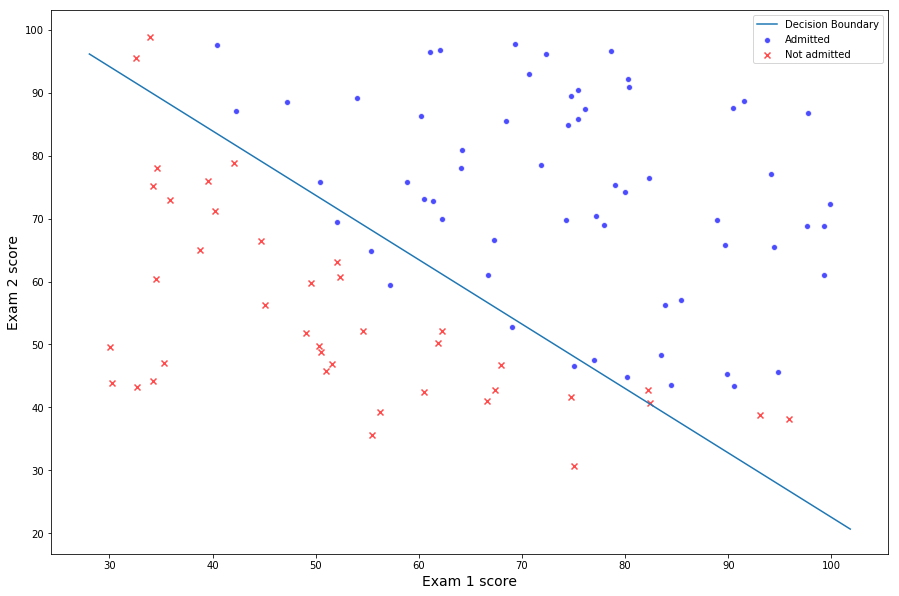

In [34]:
# Plot Boundary
plotDecisionBoundary(plotData, theta, X, y)

**Great!**

Looks very much like our previous plot, with a sensible-looking decision boundary that seems to correctly classify most of the data-points.

<a id="section4"></a>
#### 1.2.4 Evaluating logistic regression

After learning the parameters, we can use the model to predict whether a particular student will be admitted. For example, a student with an Exam 1 score of 45 and an Exam 2 score of 85 should result in an admission probability of 0.776.

Another way to evaluate the quality of the parameters we have found is to see how well the learned model predicts our our training set. The next part of the assignment is to complete the code in function `predict()`. The `predict()` function will produce “1” or “0” predictions given a dataset and a learned parameter vector $\theta$.

Note that testing the $\theta$ parameters against *the training data set* isn't a great test - in "real-life" situations, we would normally split the training data into:
* a training set (say 70% of the total data points) - which we use to train the model; and
* a test set (say 30% of the data points) - which we use to test the model

In this way we can test how well the model predicts the output of previously unseen data *that we know comes from the same population* as the training data. If that gives us a good result, we're likely to be more confident that the model can generalize well to new, genuinely unseen data...so long as we've got good reason to believe that new data is from the same population.

[Note also that what constitutes a "good result" is very much a value judgement].
<a id="predict"></a>

In [36]:
def predict(theta, X):
    """
    Predicts whether the label/class for each data point in matrix X
    ...of data points is 0 or 1, using a trained logistic regression classifier.
    Computes the predictions for each data point in X using a threshold at 0.5 
    ...(i.e., if sigmoid(theta.T*x) >= 0.5, predict 1; else predict 0)
    
    Parameters
    ----------
    theta : array_like
        Parameters for logistic regression. A vector of shape (n), where n is
        ...the number of features *including* the intercept (theta_0).
    
    X : array_like
        The data to use for computing predictions. The rows is the number 
        of points to compute predictions, and columns is the number of
        features.

    Returns
    -------
    p : array_like
        Predictions of 0 or 1 for each row in X. 
       
    """
    m = X.shape[0] # Number of training examples
    
    # instantiate np array filled with 0s to hold class probabilities
    p = np.zeros(m)
    
    # run sigmoid function on X x theta to generate class probabilities
    p = sigmoid(np.dot(X, theta.T))
    
    # convert class probabilities to 1 or 0
    # ...if probability >= 0.5, class is 1; else class is 0
    p[p >= 0.5] = 1    
    p[p < 0.5] = 0

    return p

We can now look at the accuracy of the classifier we trained by computing the percentage of examples it got correct:

In [39]:
#  Predict probability for a student with score 45 on exam 1 
#  and score 85 on exam 2 
prob = sigmoid(np.dot([1, 45, 85], theta))
print('For a student with scores of 45 and 85, '
      'we predict an admission probability of {:.3f}'.format(prob))
print('Expected value: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.00 %')

For a student with scores of 45 and 85, we predict an admission probability of 0.776
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.00 %
Expected accuracy (approx): 89.00 %


**BOOM!**

### 1.3 An object-oriented implementation

Given Python is an object-oriented language, and is widely-used in object-oriented programming, I thought it would be interesting and a valuable learning objective to implement an object-oriented version of logistic regression.

The code below draws pretty-much wholesale from Sebastian Raschka and Vahid Mirjalili's excellent *Python Machine Learning (2nd ed.)* (see e.g. [here](https://www.amazon.co.uk/Python-Machine-Learning-scikit-learn-TensorFlow/dp/1787125939))

Now, because of the way they have implemented this, we need to define our $X$ matrix to be a (100 x 2) dimensional matrix - i.e. leave out the intercept term. So let's do that first:

In [40]:
data.head()

,Theta_0,Score1,Score2,Label
0,1.0,34.623660,78.024693,0
1,1.0,30.286711,43.894998,0
2,1.0,35.847409,72.902198,0
3,1.0,60.182599,86.308552,1
4,1.0,79.032736,75.344376,1


In [41]:
X = data.iloc[:,1:3].values

Let's also create a small test data set to make de-bugging a bit easier

In [42]:
X_test = data.iloc[0:5, 1:3].values

In [43]:
y_test = y[0:5]

In [44]:
X_test

array([[ 34.62365962,  78.02469282],
       [ 30.28671077,  43.89499752],
       [ 35.84740877,  72.90219803],
       [ 60.18259939,  86.3085521 ],
       [ 79.03273605,  75.34437644]])

In [45]:
y_test

array([0, 0, 0, 1, 1])

In [46]:
class LogisticRegressionGD (object):
    """
    Logisitic regression classifier using gradient descent
    
    Parameters
    ----------
    learning_rate: float - learning rate (between 0.0 and 1.0)
    num_iterations: int - number of learning iterations over the training dataset
    random_state: int - random number generator seed for random weight initialization
    
    Attributes
    ----------
    w_: 1-d array - weights after fitting
    cost_: list - logistic cost function value in each training iteration
    """
    def __init__(self, learning_rate = 0.05, num_iterations = 100, random_state = 1):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.random_state = random_state
        
    def fit (self, X, y):
        """
        Fit training data
        
        Parameters
        ----------
        X: array-like, shape = [num_samples, num_features]
            Training vectors, where num_samples is the number of samples, and
            num_features is the number of features
        
        y: array-like, shape = [num_samples]
            Target values
        
        Returns
        -------
        self: object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal (loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.cost_ = []
        
        for i in range (self.num_iterations):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.learning_rate * X.T.dot(errors)
            self.w_[0] += self.learning_rate * errors.sum()
            
            # we calculate the logistic cost function below
            cost = (-y.dot(np.log(output)) - ((1-y).dot(np.log(1 - output))))
            self.cost_.append(cost)
            
            # some print statements for debugging
            print("Iteration {}".format(i))
            print("net_input is {}".format(net_input))
            print("output is {}".format(output))
            print("cost is {}".format(cost))
            
        return self
        
        
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
        
        
    def activation(self, z):
        """Compute logistic sigmoid activiation"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))

        
    def predict (self, X):
        """Return predicted class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, 0)

OK, that's our LinearRegressionGD() class defined.

Now, if you look closely, you'll see that Raschka and Mirjalili have implemented this in such a way that our $X$ matrix needs to be input as **just** including the features - where as our version of the X matrix already includes the intercept term.

So we'll have to create a new sub-set of the data just including the two features. While we're at it, let's create a small test version of the data for de-bugging purposes:

In [47]:
# extract small sub-set of the X-data, only including columns 1 and 2
X_test = data.iloc[0:5, 1:3].values

In [48]:
# extract a small sub-set of the y-data
y_test = y[0:5]

OK, let's look at the how our object-oriented logisitic regression object works on our test data set:

In [49]:
lrgd = LogisticRegressionGD (learning_rate = 0.1, num_iterations = 10, random_state = 1)
lrgd.fit(X_test, y_test)

Iteration 0
net_input is [-0.60767339 -0.40087842 -0.58810419 -0.80778485 -0.86519209]
output is [ 0.35259011  0.40110131  0.35706996  0.30836273  0.29625571]
cost is 3.7821686471901605
Iteration 1
net_input is [ 531.80694469  364.08001437  517.88593365  719.61896395  787.24988217]
output is [ 1.  1.  1.  1.  1.]
cost is nan
Iteration 2
net_input is [-1337.44515968  -796.55278789 -1263.89898456 -1568.54705203 -1477.23978392]
output is [  2.66919022e-109   2.66919022e-109   2.66919022e-109   2.66919022e-109
   2.66919022e-109]
cost is 500.0
Iteration 3
net_input is [ 406.06128833  334.86016177  413.83729983  664.69004443  841.18101201]
output is [ 1.  1.  1.  1.  1.]
cost is nan
Iteration 4
net_input is [-1463.19081605  -825.77264049 -1367.94761838 -1623.47597155 -1423.30865408]
output is [  2.66919022e-109   2.66919022e-109   2.66919022e-109   2.66919022e-109
   2.66919022e-109]
cost is 500.0
Iteration 5
net_input is [ 280.31563197  305.64030916  309.78866602  609.76112492  895.1121418

/Users/Matt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in log


**Hmmm - this doesn't look good!**

As you can see from the various debugging statements, at the end of the first iteration, our weights have been updated to values [0.04470547, 6.00261575, 4.15163076].

As a result, on the second iteration, our net_input values become very large - the smallest value is now 364.

The impact of this is that our activation terms end up containing only the value *1*...so, when we calculate the cost function, we run into problems: the cost function includes the term $(1 - ln(activation terms)$ - which results in us trying to calculate the ln of *0* - which is undefined.

As a result, the cost function ends up containing lots of *NaN* values. We can see this explicitly if we look at lrgd.cost_

In [50]:
lrgd.cost_

[3.7821686471901605, nan, 500.0, nan, 500.0, nan, 500.0, nan, 500.0, nan]

**What's going on ?**

Well, what I think is going on is that the object-oriented implementation we've taken from Raschka and Mirjalili requires the input data ($X$) to be **standardized**.

So let's do that for our little test set of data. If it works for that, we'll it apply to the whole data set.

We'll use `scikitlearn.preprocessing`'s `StandardScaler()` module to standardize our data.

In [51]:
sc = StandardScaler()
sc.fit(X_test)
X_test_std = sc.transform(X_test)

Now let's try instantiating a `LogisiticRegressionGD` object with our standardized data:

In [52]:
lrgd2 = LogisticRegressionGD (learning_rate = 0.1, num_iterations = 10, random_state = 1)
lrgd2.fit(X_test_std, y_test)

Iteration 0
net_input is [ 0.0181494   0.03206324  0.01962502  0.00676294  0.00461667]
output is [ 0.50453723  0.50801512  0.5049061   0.50169073  0.50115416]
cost is 3.495191126444543
Iteration 1
net_input is [-0.13749003 -0.49248112 -0.1681441   0.24444829  0.37473256]
output is [ 0.46568154  0.37930925  0.45806273  0.56080957  0.59260203]
cost is 2.8178966782576893
Iteration 2
net_input is [-0.27469582 -0.91706902 -0.32895007  0.4323322   0.68121574]
output is [ 0.43175464  0.28555548  0.41849611  0.60643044  0.66400999]
cost is 2.3532128741444795
Iteration 3
net_input is [-0.39691238 -1.26670219 -0.46863826  0.5831122   0.93885034]
output is [ 0.4020544   0.21982231  0.3849386   0.64178321  0.71886737]
cost is 2.022105360810392
Iteration 4
net_input is [-0.50703425 -1.56143583 -0.59200222  0.70690378  1.15954528]
output is [ 0.37588902  0.17344071  0.35617558  0.66971665  0.76125008]
cost is 1.775933868152822
Iteration 5
net_input is [-0.60723668 -1.81542679 -0.70252014  0.81091539

**OK**, we don't have any overflow errors or `NaN` values.

So, now we'll standardize the whole dataset (i.e. all of $X$) and re-instantiate a new `LogisticRegressionGD` object. This time - because we're doing it for real, not just to test our code, we'll change the learning rate to 0.1, and the number of iterations to 1000

Remember - we first have to pull out **only** the data columns from our dataframe - both our `LogisticRegressionGD` object, and our StandardScaler() object, expect *feature* columns only.

Note that, because we've got all of the debugging `print` statements still in our definition of `LogisticRegressionGD`, the output is going to be rather verbose!

In [53]:
# first we scale X using the fit() method 
X = data.iloc[:,1:3].values
sc2 = StandardScaler()
sc2.fit(X)
X_std = sc.transform(X)

# then we instantiate a new LogisticRegressionGD object
lrgd3 = LogisticRegressionGD (learning_rate = 0.01, num_iterations = 1000, random_state = 1)
lrgd3.fit(X_std, y)

Iteration 0
net_input is [ 0.0181494   0.03206324  0.01962502  0.00676294  0.00461667  0.02267929
  0.00272521  0.01646802  0.00115393  0.01449918  0.01270749  0.02231192
  0.00313001 -0.00041575  0.017271    0.00773167  0.01614901  0.01873566
  0.00091479  0.01545521  0.02032958  0.00463275  0.02362923  0.03066516
  0.00731208  0.01206835  0.01541412  0.01339467  0.01942486  0.0215596
  0.01131502  0.00923185  0.01788952  0.01560134  0.01882547  0.02105959
  0.01074866  0.00743483  0.0183686   0.01931365  0.00999517  0.02403029
  0.00315927  0.01624114  0.02457213  0.01863574  0.00700698 -0.0056757
  0.00231512 -0.00436795  0.00475108  0.00325421  0.01255328  0.02463633
  0.02336301  0.01992867  0.0009071   0.01238367  0.00820127  0.00584327
  0.00199178  0.0292849   0.025273    0.03005143  0.01910453  0.02123409
  0.00909907  0.02299866 -0.00193169  0.01388734  0.03148227  0.00853299
 -0.00084436  0.01151104  0.01102768 -0.00109043  0.01019146  0.0137852
  0.02271091  0.01551808  0.0

Iteration 17
net_input is [-0.7021977  -4.51590614 -1.10060496  2.49788184  3.15151417 -1.90114538
  3.6034016  -0.0980078   4.08620642  0.47325004  1.00341464 -1.69328316
  3.56910299  4.49048304 -0.44475145  2.21111764 -0.03232986 -0.74245686
  4.13194372  0.18548831 -1.17962069  3.18538182 -2.14085935 -4.12015781
  2.41175032  1.05714769  0.20824753  0.80595961 -0.95257528 -1.6181336
  1.2595815   1.91459016 -0.56841176  0.05597673 -0.86657196 -1.42467613
  1.31546941  2.32883236 -0.61766494 -1.02158836  1.70082282 -2.24669743
  3.60473654 -0.00967821 -2.39640467 -0.73575555  2.4924078   6.02842037
  3.71881952  5.64912858  3.11810011  3.59617893  1.02640853 -2.47331862
 -2.0690799  -1.13410859  4.23103277  0.86434297  2.15581346  2.79067298
  3.85496773 -3.73952261 -2.56901198 -3.96755483 -0.926818   -1.42944521
  1.78928113 -1.97398564  4.94353026  0.5766969  -4.34856166  2.02856753
  4.61820111  1.20276223  1.32889653  4.78415055  1.51555092  0.54603324
 -1.8545238   0.18718737  

   7.32380181e-01   9.99627703e-01   3.69684885e-01   9.99228799e-01]
cost is 20.57270909778198
Iteration 127
net_input is [ -1.9211617   -8.62123315  -2.59534713   4.03749891   5.46390352
  -3.84594548   5.97460295  -0.24978452   7.04462463   0.88833235
   1.98600526  -3.02473565   6.24053251   7.64439168  -1.3978885
   3.44331402  -0.22699456  -1.47942221   7.04067525   0.2733307
  -2.2486417    5.68627923  -4.17917553  -7.87259463   4.16015117
   1.56359612   0.36223695   1.60036711  -1.93883401  -3.45039634
   1.90200951   3.41028524  -1.41994019  -0.33485595  -2.12086408
  -2.87049373   1.57744086   3.80480293  -1.15727936  -2.48345923
   3.01539474  -4.34771132   6.48889757   0.01664023  -4.61578656
  -1.55567594   4.28921744  10.75570453   6.19019951  10.00065513
   5.41979137   6.54817711   1.9443769   -5.00332644  -4.05813737
  -2.44261992   7.6274403    0.77221004   3.65853577   4.72513365
   6.63161491  -7.19403269  -4.83606246  -7.67094484  -2.1575992
  -2.69563712   2.5020

Iteration 271
net_input is [ -2.19423176e+00  -9.65902563e+00  -2.94368759e+00   4.46647416e+00
   6.07381111e+00  -4.32686695e+00   6.62433888e+00  -2.92330033e-01
   7.83094867e+00   9.84455938e-01   2.21825157e+00  -3.38219913e+00
   6.94188441e+00   8.49196882e+00  -1.60660682e+00   3.79857894e+00
  -2.72975102e-01  -1.66866650e+00   7.82105294e+00   2.92125215e-01
  -2.52575975e+00   6.33218567e+00  -4.69240002e+00  -8.82146088e+00
   4.62098540e+00   1.71393996e+00   3.94368074e-01   1.78607253e+00
  -2.18639837e+00  -3.89279813e+00   2.08985544e+00   3.79358743e+00
  -1.61845059e+00  -4.10292185e-01  -2.41092067e+00  -3.23106028e+00
   1.70068280e+00   4.21141052e+00  -1.30304725e+00  -2.82078484e+00
   3.35236506e+00  -4.87903730e+00   7.23070663e+00   1.17553493e-02
  -5.17803980e+00  -1.75936193e+00   4.76395910e+00   1.19850845e+01
   6.86537897e+00   1.11380745e+01   6.02561532e+00   7.30159656e+00
   2.16652479e+00  -5.62626671e+00  -4.55787729e+00  -2.75973549e+00
   8.50

net_input is [ -2.28586173e+00  -1.00127813e+01  -3.06120820e+00   4.61430917e+00
   6.28269264e+00  -4.49037738e+00   6.84786245e+00  -3.07074637e-01
   8.10051547e+00   1.01677307e+00   2.29664662e+00  -3.50498572e+00
   7.18196025e+00   8.78291771e+00  -1.67642691e+00   3.92146404e+00
  -2.88573449e-01  -1.73335476e+00   8.08887620e+00   2.98318684e-01
  -2.62056454e+00   6.55283724e+00  -4.86729034e+00  -9.14492171e+00
   4.77878305e+00   1.76606773e+00   4.04961946e-01   1.84865008e+00
  -2.27076159e+00  -4.04274971e+00   2.15489812e+00   3.92437729e+00
  -1.68545405e+00  -4.35067746e-01  -2.50868454e+00  -3.35380007e+00
   1.74505886e+00   4.35135374e+00  -1.35319273e+00  -2.93443571e+00
   3.46734123e+00  -5.06019316e+00   7.48400069e+00   9.53089153e-03
  -5.36977896e+00  -1.82869268e+00   4.92656801e+00   1.24054737e+01
   7.09757904e+00   1.15272522e+01   6.23304610e+00   7.55861055e+00
   2.24174511e+00  -5.83792533e+00  -4.72812776e+00  -2.86729272e+00
   8.80024937e+00   8

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


Now let's try printing the cost function as a function of the number of iterations once more.

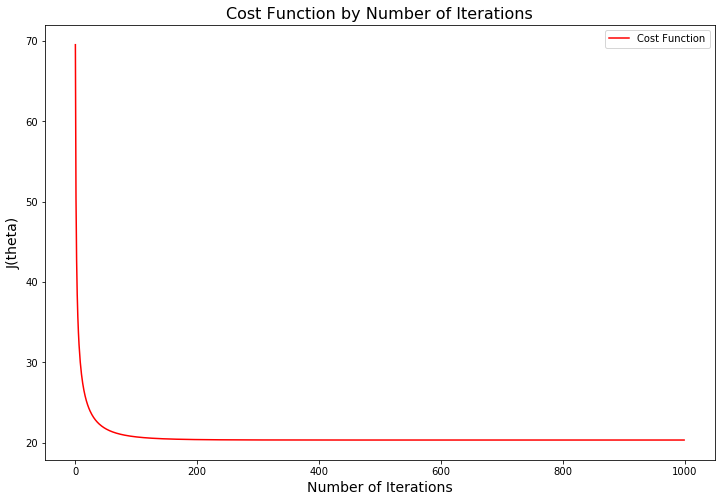

In [54]:
# define our figure and axis
fig, ax = plt.subplots(figsize=(12,8))

# select x and y-values
x_values = list(range(lrgd3.num_iterations))
y_values = lrgd3.cost_

# plot cost over time
ax.plot(x_values, y_values, 'r', label = "Cost Function")

# add axis labels
ax.set_title("Cost Function by Number of Iterations", fontsize = 16)
ax.set_xlabel("Number of Iterations", fontsize = 14)
ax.set_ylabel("J(theta)", fontsize = 14)
ax.legend()
plt.show()

That looks like the right shape.

Now, let's try plotting the decision boundary for our `LogisticRegressionGD` object fitted on X_std. 

**Remember**, however, that our `plotDecisionBoundary()` function expects our $X$ matrix to *include* the intercept term. So before we start, we're going to have to add a leading column of *1*s.

In [55]:
# first we create a numpy array filled with 1s, with m rows
ones = np.ones(len(X_std))
# then we join this to X
X_std = np.column_stack([ones, X_std])
X_std.shape

(100, 3)

Now we can plot the decision boundary.

**NOTE** In order to create the plot below I've commented out a couple of lines in our plotDecisionBoundary() function above - the ones setting the x- and y-axes to run between 30 and 100. This is because our standardized x-values run between approx. -3 and 5, and our standardized y-values run between approx. -6 and 4.

theta's shape is (3,)
theta is [-0.89925872  3.85975255  2.90591439]
Decision boundary line (plot_y) is [ 4.23867315 -6.02513799]


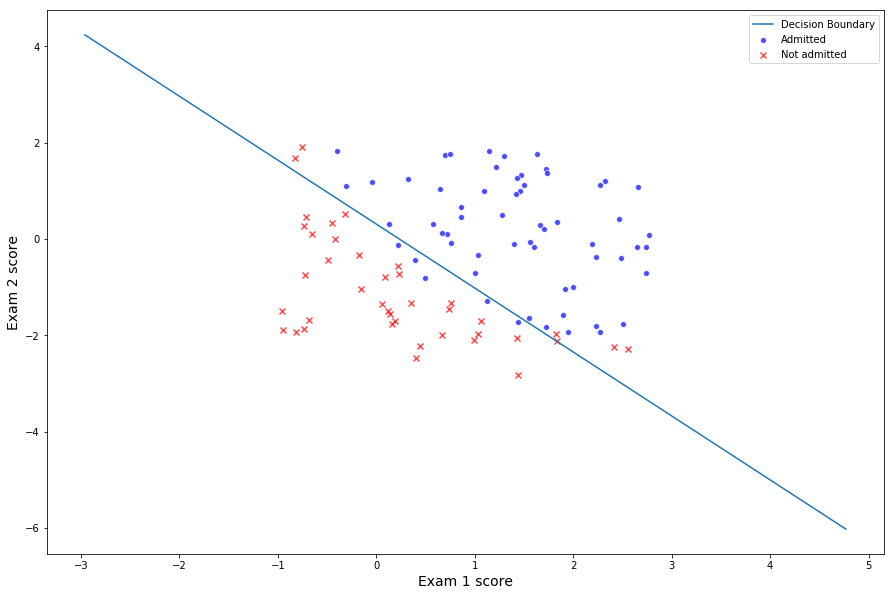

In [56]:
# plot decision boundary for model fitted on X_std
plotDecisionBoundary(plotData, lrgd3.w_, X_std, y)

This looks good!

Finally, let's check the accuracy of our training set. Now, our `predict()` function expects including the intercept term; but that's OK, because we've already added this above.

**NOTE** if we use the `predict()` function to predict a point for which we know the expected outcome, because we're using standardized data, we'll get a *standardized* result. So we'd need to convert that back into nominal terms if we want to compare the prediction for specific values of Exam1 and Exam2 scores. I'm not going to do that, I'm just going to compare the training accuracy that results from our model with what we expect.

In [57]:
# Compute accuracy on our training set
p = predict(lrgd3.w_, X_std)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.00 %')

Train Accuracy: 89.00 %
Expected accuracy (approx): 89.00 %


**BOOM!**

### 1.4 Using `scikitlearn`

Finally, let's use scikitlearn's optimized implementation to do this all very quickly.
We're going to want to use standardized values, and our $X$ input needs to be *features only* - no leading column of *1*s.

In [58]:
# extract our X-data, only including columns 1 and 2
X_scikit = data.iloc[:, 1:3].values

# standardize our X-data
sc3 = StandardScaler()
sc3.fit(X_scikit)
X_scikit_std = sc.transform(X_scikit)

# instantiate our LogisticRegression object
lr = LogisticRegression(C = 1.0, random_state = 1)
lr.fit(X_scikit_std, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

To plot the output, we need to access the $\theta$ parameters of our `LogisticRegression` object. These are actually held in two different attributes:
- The `intercept_` attribute holds the intercept term
- The `coef_` attributed holds the remaining $\theta$ values

In [59]:
lr.coef_

array([[ 2.30462336,  1.77206862]])

In [60]:
lr.intercept_

array([-0.44080726])

In [61]:
theta2 = np.column_stack([lr.intercept_, lr.coef_])
theta2T = theta2.T

Once again, let's plot the decision boundary. As before, we'll need to add a leading column of 1s to our X-data so that it meets the requirements of our `plotDecisionBoundary()` function.

In [62]:
# add a column of ones (already defined above) to our X-data
X_scikit_std = np.column_stack([ones, X_scikit_std])
X_scikit_std.shape

(100, 3)

theta's shape is (3, 1)
theta is [[-0.44080726]
 [ 2.30462336]
 [ 1.77206862]]
Decision boundary line (plot_y) is [ 4.09598672 -5.95367471]


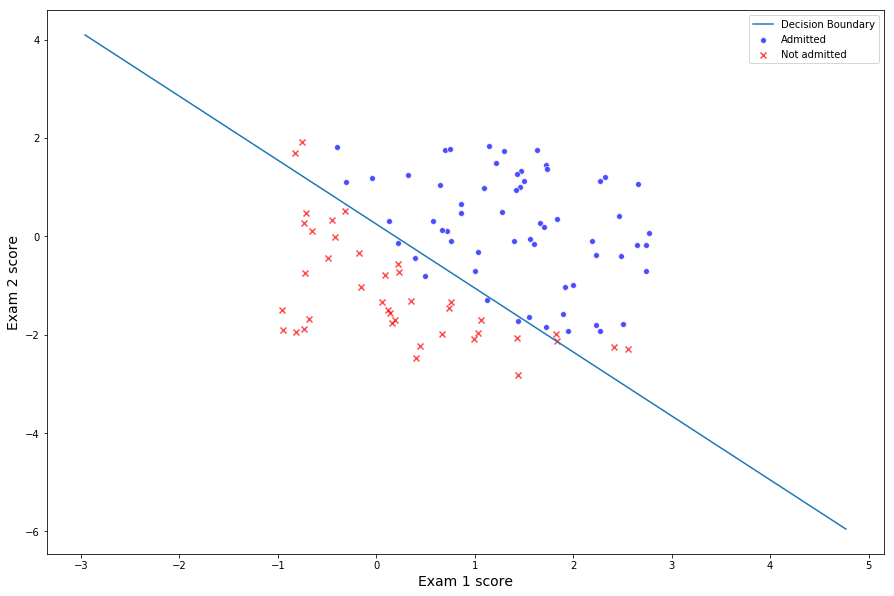

In [63]:
# plot decision boundary for model fitted on X_std
plotDecisionBoundary(plotData, theta2T, X_scikit_std, y)

Looking good!

Finally, let's see how accurate the model is on our training set.

In [64]:
# Compute accuracy on our training set
p = predict(theta2, X_scikit_std)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.00 %')

Train Accuracy: 52.20 %
Expected accuracy (approx): 89.00 %


What?!?!?! `scikitlearn` is way **less** accurate than our own implementatations?

Something funny's going on here...let's take a look. First let's implement a comparison between p and y "by hand":

In [65]:
counter = 0
for item in range (len(y)):
    if p[item] == y[item]:
        counter += 1
print("final counter = {}%".format(counter))

final counter = 89%


This is interesting! I'm not sure, but my best guess is that because the shapes of our two np arrays *p* and *y* are different, numpy evaluates `p == y` differently from the way it evalues `p[i] == y[i]`.

In [66]:
p.shape

(100, 1)

In [67]:
p2 = np.squeeze(p)
p2.shape

(100,)

In [68]:
print('Train Accuracy: {:.2f} %'.format(np.mean(p2 == y) * 100))

Train Accuracy: 89.00 %


OK, interesting. When we re-shape p to be (100,), we get the "right" result.
Another time, I might take the time to dig into numpy and look at the order in which it evaluates items in an array, depending on the shape/dimensions. Not today though!

### 1.5 To conclude this whole section 1 on "simple" logistic regression:
- We implemented our own function to perform logistic regression on our dataset. It acheived an expected 89% accuracy in classifying data points.
- We then implemented an object-oriented approach. This also achieved the expected 89% accuracy.
- Finally we used `scikitlearn`'s implementation. This also achieved 89% accuracy.
- We got to practice manipulating `numpy` arrays along the way, and we also learned to respect the intricacies of different functions - e.g. what format/shape they expect data to arrive in!

## 2 Regularized logistic regression

In this part of the exercise, we will implement regularized logistic regression to predict whether microchips from a fabrication plant pass quality assurance (QA).

During QA, each microchip goes through various tests to ensure it is functioning correctly. We are asked to imagine that we are the product manager of the factory and we have the test results for some microchips on two different tests. From these two tests, we'd like to determine whether the microchips should be accepted or rejected. To help us make the decision, we have a dataset of test results on past microchips, from which we can build a logistic regression model.

First, we load the data from a CSV file - this time directly into numpy arrays:

In [69]:
# Load Data
# The first two columns contains the X values and the third column
# contains the label (y).
data2 = np.loadtxt(os.path.join('Data', 'ex2data2.txt'), delimiter=',')
X = data2[:, :2]
y = data2[:, 2]
data2.shape

(118, 3)

### 2.1 Visualize the data

As in part 1, we can use our `plotData()` function to generate a figure, where the axes are the two test scores, and the positive (y = 1, accepted) and negative (y = 0, rejected) examples are shown with different markers. `plotData()` will plot all 118 data-points onto a scatter plot for us.

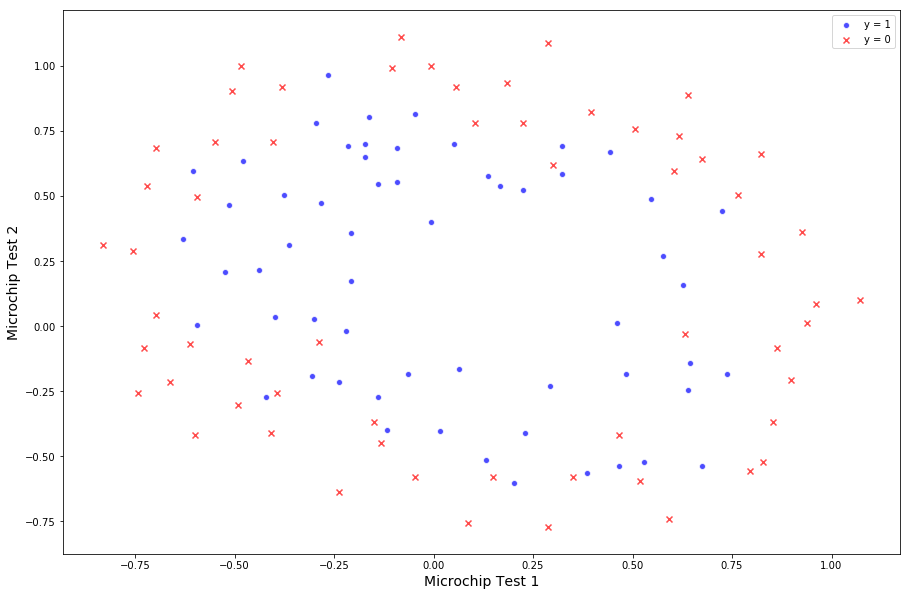

In [70]:
plotData(X, y)
# Labels and Legend
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

# Specified in plot order
plt.legend(['y = 1', 'y = 0'], loc='upper right')
pass

Looking at the figure above, we can see:
1. It looks like there is a reasonably clear distinction between the microchips that pass and those that fail, based on the scores of tests 1 and 2; and
2. The distinction is not defined by a straight-line through the plot (it's more like the distance along a circle or oval centred somewhere around a score of 0.12 on both tests).

Put another way, the relationship between scores on test 1 and test 2, and class membership (pass or fail QA) is *not linear* - it's some kind of function of test scores raised to some power.

As a result, a linear application of logistic regression will not perform well on this dataset since logistic regression will only be able to find a linear decision boundary. Another way to put this is to say that our two classes are not *linearly separable*.

### 2.2 Feature mapping
Interestingly, there are some posts on e.g. stackoverflow saying that one **can't** use logistic regression to classify data that aren't linearly-separable - using exactly the example data that we are using! See e.g. [here](https://stackoverflow.com/questions/40647639/logistic-regression-in-scikitlearn).

Instead, these people say we should use a different type of classifer / model, such as random-forest, or a support vector machine.

However, other posts make the point that we can do something different, which is to *pre-process our data and project it onto a different space*. One way we can do this is to create a number of new (synthetic) features from our data, such that our two classes become linearly separable.

Helpfully, **dibgerge** has written a `mapFeature()` function, defined in the file `utils.py`, which will map the features into all polynomial terms of $x_1$ and $x_2$ up to the sixth power.

$$ \text{mapFeature}(x) = \begin{bmatrix} 1 & x_1 & x_2 & x_1^2 & x_1 x_2 & x_2^2 & x_1^3 & \dots & x_1 x_2^5 & x_2^6 \end{bmatrix}^T $$

As a result of this mapping, our vector of two features (the scores on two QA tests) has been transformed into a 28-dimensional vector. A logistic regression classifier trained on this higher-dimension feature vector will have a more complex decision boundary and will appear nonlinear when drawn in our 2-dimensional plot.

Alternative approaches to finding a space in which our data are linearly separable might include:
- projecting onto cartesian space - which is, I think, a really neat idea given our data;
- using manifold learning to find a linearly separable space.

While the feature mapping allows us to build a more expressive classifier, however, it's also more susceptible to overfitting. In the next parts of the exercise, we implement regularized logistic regression to fit the data and see how regularization can help address the overfitting problem.

In [71]:
# Note that mapFeature also adds a column of ones for us
# ...so the intercept term is handled
X = utils.mapFeature(X[:, 0], X[:, 1])
X.shape

(118, 28)

We can see that for each of our 118 data points, we now have 27 features (plus our interept column of *1*s), instead of our original 2 features.

<a id="section5"></a>
### 2.3 Cost function and gradient

The main idea of regularized logistic regression is as follows:
- When we add multiple new features, that are combinations of powers of the original features, we can find a formula that is able to accurately fit our data - i.e. separate it into two distinct classes with a small error. (Statistically, we can *always* reduce the error by adding a new term).
- However, there is a high likelihood that, in doing so, we will "overfit" the data - i.e. our formula will provide a good fit for our training data, but will not generalize will to new data points. One way to think about this is that the model "learns to fit the noise" in the training data. Since that pattern of noise doesn't exist in the more general population of data points, the model won't produce accurate results for that general population.
- Overfitting  is sometimes referred to as the model having "high variance"  - meaning the model has a high variability of we were to retrain the model multiple times on different sub-sets of the data, we would see high variability between the different versions of the model.
- In contrast, if the model underfits the data, it may be said to have "high bias" - meaning that the predictions of the model are systematically a long way off the actual data - bias is a measure of the systematic error that is not due to randomness.

To address this risk, we add a second term to our cost function, which increases with the square of our $\theta$ parameters. This can be thought of as *penalizing* large values of these of parameters. The cost function for regularized logistic regression is:

$$ J(\theta) = \frac{1}{m} \sum_{i=1}^m \left[ -y^{(i)}\log \left( h_\theta \left(x^{(i)} \right) \right) - \left( 1 - y^{(i)} \right) \log \left( 1 - h_\theta \left( x^{(i)} \right) \right) \right] + \frac{\lambda}{2m} \sum_{j=1}^n \theta_j^2 $$

Since the new final term in this cost function varies with the *square* of the weights, this is known as "*L2 regularization*".

This regularized cost function uses a new hyper-parameter, $\lambda$ to balance the effects of
- *increasingly good fit* of our complex function of the features; and
- the risk of over-fitting.

By adjusting, or "tuning" the value of $\lambda$ we can - hopefully! - find a happy medium between under- and over-fitting the data.

So, now we have to implement the code to compute the cost function and gradient for *regularized logistic regression*.

**Note** that we don't regularize the parameters $\theta_0$.

The gradient of the cost function is a vector where the $j^{th}$ element is defined as follows:

$$ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \qquad \text{for } j =0 $$

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \left( \frac{1}{m} \sum_{i=1}^m \left( h_\theta \left(x^{(i)}\right) - y^{(i)} \right) x_j^{(i)} \right) + \frac{\lambda}{m}\theta_j \qquad \text{for } j \ge 1 $$

**Note** also that `lambda` is a reserved name in Python - so we don't want to use it as a variable name in our function! So let's use `lambda_` instead.

<a id="costFunctionReg"></a>

In [72]:
def costFunctionReg(theta, X, y, lambda_):
    """
    Compute cost and gradient for logistic regression with regularization.
    
    Parameters
    ----------
    theta : array_like
        Logistic regression parameters. A vector with shape (n, ). n is 
        the number of features including any intercept. If we have mapped
        our initial features into polynomial features, then n is the total 
        number of polynomial features. 
    
    X : array_like
        The data set with shape (m x n). m is the number of examples, and
        n is the number of features (after feature mapping).
    
    y : array_like
        The data labels. A vector with shape (m, ).
    
    lambda_ : float
        The regularization parameter. 
    
    Returns
    -------
    J : float
        The computed value for the regularized cost function. 
    
    grad : array_like
        A vector of shape (n, ) which is the gradient of the cost
        function with respect to theta, at the current values of theta.
    
    Instructions
    ------------
    Compute the cost `J` of a particular choice of theta.
    Compute the partial derivatives and set `grad` to the partial
    derivatives of the cost w.r.t. each parameter in theta.
    """
    # initialize some useful values
    m = X.shape[0] # number of training examples
    n = X.shape[1] # number of features *including leading 1s - i.e. the intercept*

    # instantiate initial values of J and grad
    J = 0
    grad = np.zeros(theta.shape)
    
    # calculate the value of J at each step
    net_input = np.dot(X, theta)
    y_hat = sigmoid(net_input)
    J_term1 = -y.dot(np.log(y_hat))
    J_term2 = (1-y).dot(np.log(1-y_hat))
    J_term3 = (lambda_ / (2 * m)) * np.sum(np.power(theta[1:n], 2)) # values of theta *excluding* initial column of 1s
    J = np.sum(J_term1 - J_term2)/m + J_term3

    # calculate [the values of] grad at each step
    
    error = y_hat - y
    for i in range(theta.shape[0]):
        term = np.multiply(error, X[:,i])
        if i == 0:
            grad[i] = np.sum(term) / len(X)
        else:
            grad[i] = (np.sum(term) / len(X)) + ((lambda_ / len(X)) * theta[i])
    
    return J, grad

Now let's look at what our `costFunctionReg()` produces when we call it in two different test cases:
- Firstly, with the the initial values of $\theta$ initialized to all zeros;
- Secondly, with the initial values of $\theta$ initialized as all being *1*.

In [73]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Set regularization parameter lambda to 1
# DO NOT use `lambda` as a variable name in python
# because it is a python keyword
lambda_ = 1

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, X, y, lambda_)

print('Cost at initial theta (zeros): {:.3f}'.format(cost))
print('Expected cost (approx)       : 0.693\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]\n')


# Compute and display cost and gradient
# with all-ones theta and lambda = 10
test_theta = np.ones(X.shape[1])
cost, grad = costFunctionReg(test_theta, X, y, 10)

print('------------------------------\n')
print('Cost at test theta    : {:.2f}'.format(cost))
print('Expected cost (approx): 3.16\n')

print('Gradient at initial theta (zeros) - first five values only:')
print('\t[{:.4f}, {:.4f}, {:.4f}, {:.4f}, {:.4f}]'.format(*grad[:5]))
print('Expected gradients (approx) - first five values only:')
print('\t[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]')

Cost at initial theta (zeros): 0.693
Expected cost (approx)       : 0.693

Gradient at initial theta (zeros) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]
Expected gradients (approx) - first five values only:
	[0.0085, 0.0188, 0.0001, 0.0503, 0.0115]

------------------------------

Cost at test theta    : 3.16
Expected cost (approx): 3.16

Gradient at initial theta (zeros) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]
Expected gradients (approx) - first five values only:
	[0.3460, 0.1614, 0.1948, 0.2269, 0.0922]


**BOOM!**

### 2.4 Optional (ungraded) exercises

The final part of this section is to try out different values of the regularization parameter, $\lambda$, for the dataset, to understand how regularization prevents overfitting. Similar to the previous parts, we can use `scipy.optimize.minimize()` to learn the optimal $\theta$ parameters.

To help visualize the model learned by this classifier, *dibgerge* has very helpfully written a function `utils.plotDecisionBoundary()` which plots the (non-linear) decision boundary that separates the positive and negative examples. In `utils.plotDecisionBoundary()`, we plot the non-linear decision boundary by computing the classifier’s predictions on an evenly spaced grid and then and draw a contour plot where the predictions change from y = 0 to y = 1.

Notice the changes in the decision boundary as we vary $\lambda$.

With a small $\lambda$, you should find that the classifier gets almost every training example correct, but draws a very complicated boundary, thus overfitting the data.

The following figures illustrate the decision boundaries for a few different values of $\lambda$. 

<table>
    <tr>
        <td style="text-align:center">
            No regularization (overfitting)<img src="Figures/decision_boundary3.png">
        </td>        
        <td style="text-align:center">
            Decision boundary with regularization
            <img src="Figures/decision_boundary2.png">
        </td>
        <td style="text-align:center">
            Decision boundary with too much regularization
            <img src="Figures/decision_boundary4.png">
        </td>        
    <tr>
</table>

For example, the boundary with $\lambda$ = 0.00 is not a good decision boundary: it predicts that a point at $x = (−0.25, 1.5)$ is accepted $(y = 1)$, which seems to be an incorrect decision given the training set.

With a larger $\lambda$, we should see a plot that shows a simpler decision boundary which still separates the positives and negatives fairly well. However, if $\lambda$ is set to too high a value, we will not get a good fit and the decision boundary will not follow the data so well, thus underfitting the data.

Train accuracy (with lambda = 0.0): 87.3%
Expected accuracy (with lambda = 1): 83.1% (approx)

Train accuracy (with lambda = 0.01): 83.9%
Expected accuracy (with lambda = 1): 83.1% (approx)

Train accuracy (with lambda = 0.1): 83.9%
Expected accuracy (with lambda = 1): 83.1% (approx)

Train accuracy (with lambda = 1): 83.1%
Expected accuracy (with lambda = 1): 83.1% (approx)

Train accuracy (with lambda = 10): 74.6%
Expected accuracy (with lambda = 1): 83.1% (approx)

Train accuracy (with lambda = 100): 61.0%
Expected accuracy (with lambda = 1): 83.1% (approx)



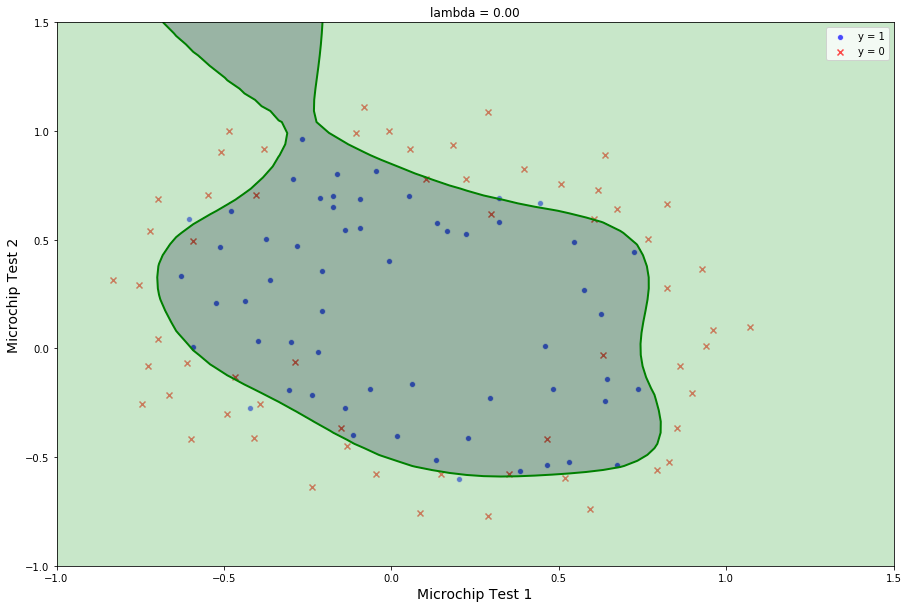

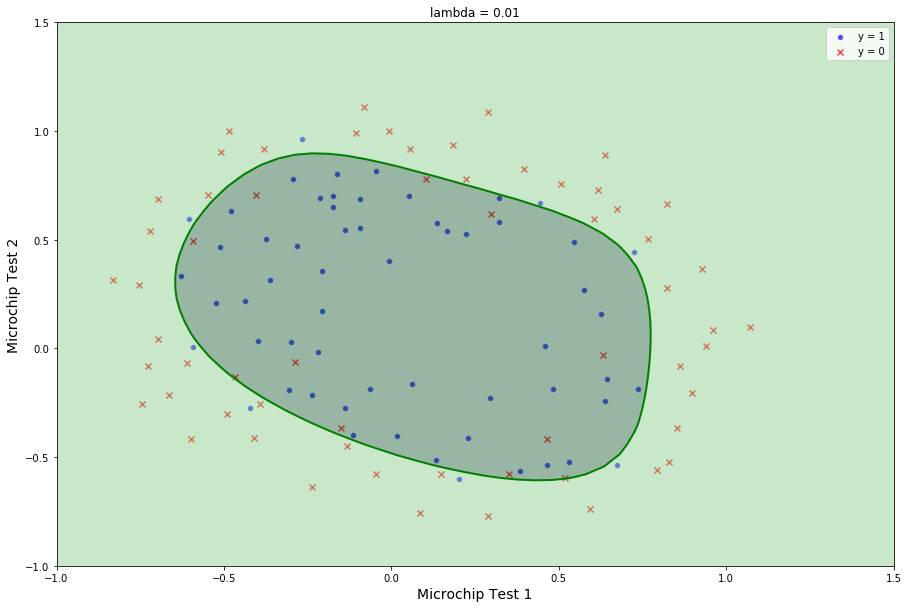

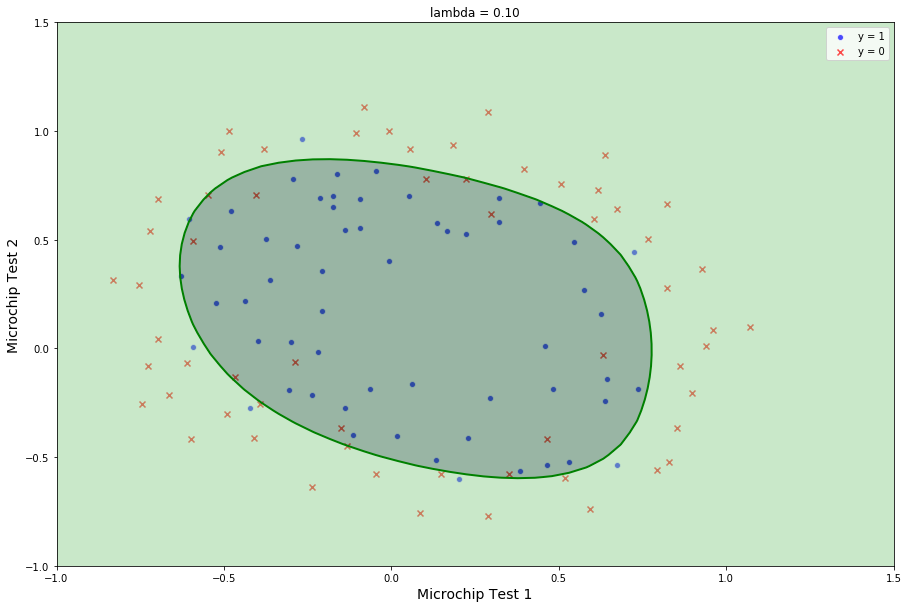

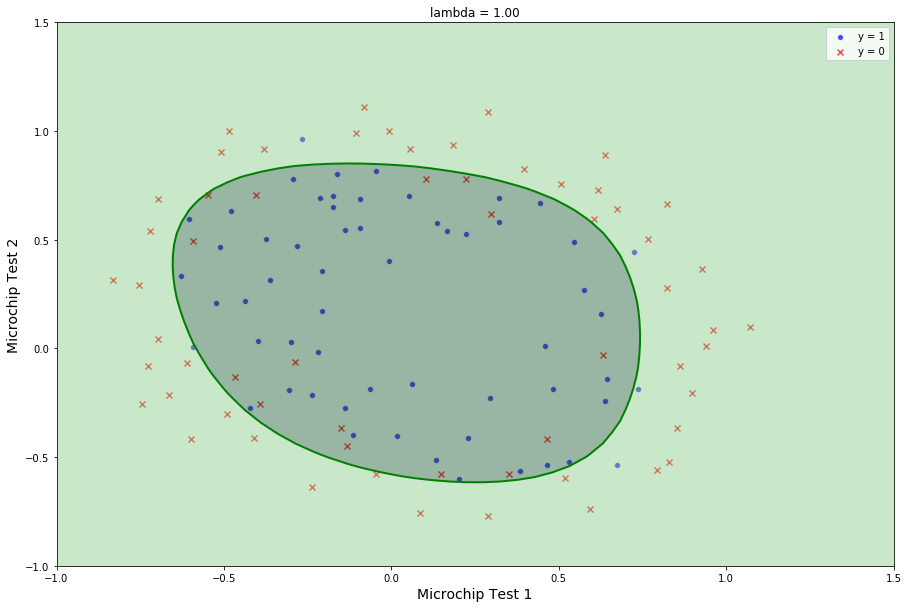

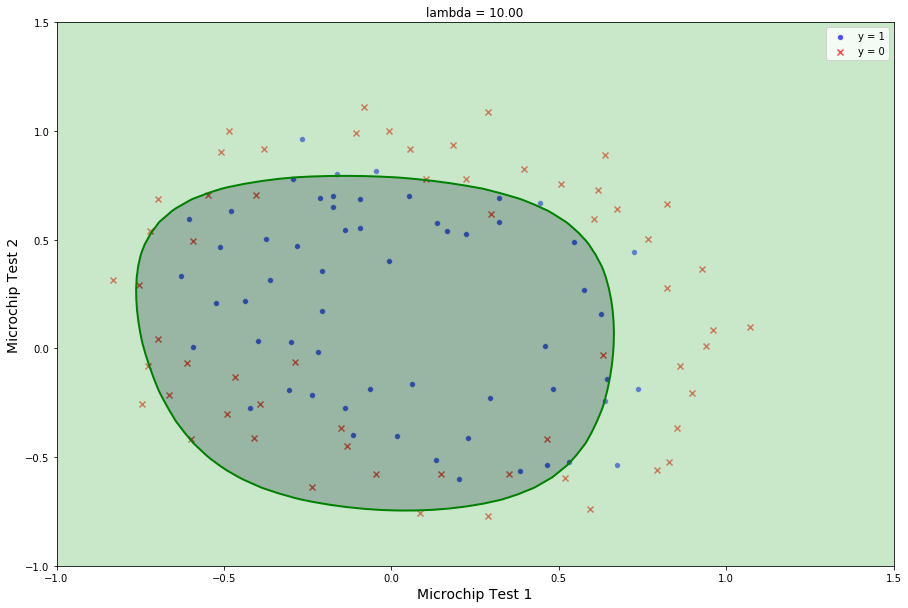

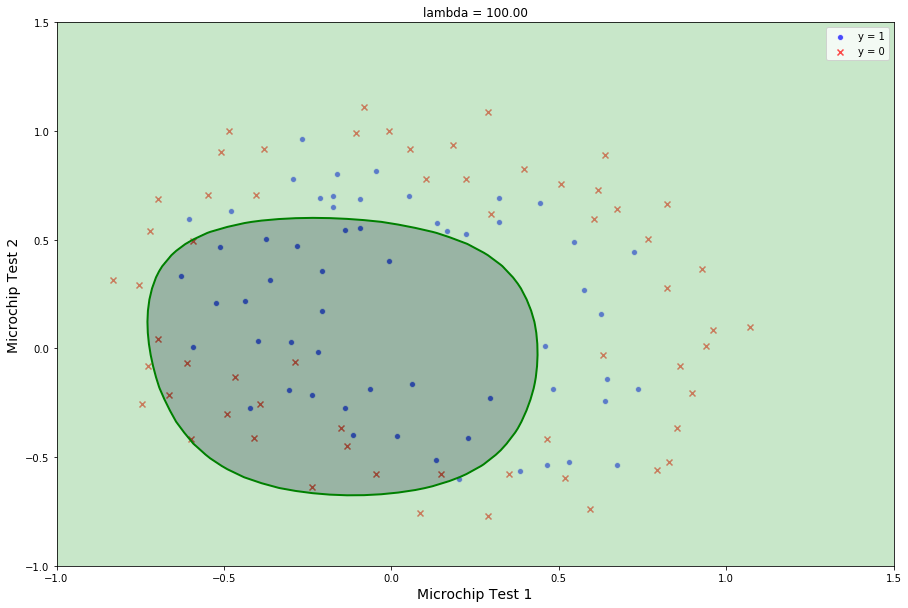

In [74]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])

# Instantiate a list of values that lambda can take - which we will loop over
lambdas = [0.00, 0.01, 0.1, 1, 10, 100]

for lambda_ in lambdas:
    # set options for optimize.minimize
    options= {'maxiter': 100}

    res = optimize.minimize(costFunctionReg,
                            initial_theta,
                            (X, y, lambda_),
                            jac=True,
                            method='TNC',
                            options=options)

    # the fun property of OptimizeResult object returns
    # the value of costFunction at optimized theta
    cost = res.fun

    # the optimized theta is in the x property of the result
    theta = res.x

    # plot the decision boundary
    utils.plotDecisionBoundary(plotData, theta, X, y)
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend(['y = 1', 'y = 0'])
    plt.grid(False)
    plt.title('lambda = %0.2f' % lambda_)
    
    p = predict(theta, X)
    print("Train accuracy (with lambda = {}): {:.1f}%".format(lambda_, (np.mean(p == y) * 100)))
    print('Expected accuracy (with lambda = 1): 83.1% (approx)\n')


### 2.5 A scikitlearn implementation of regularized logistic regression

I'd also like to see what scikitlearn's implementation of regularized logistic regression looks like.

To be clear, what we're doing is applying `scikitlearn`'s logistic regression classifier to a pre-processed set of data that we have made linearly separable by adding a number of synthetic additional terms. In fact, our data is now linearly separable in 27-dimensional space!

It turns out that implementing *regularized* logistic regression using `scikitlearn` is very simple: for a start, if we look at the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) we see that regularization is *applied by default*. Moreover, the "penalty" parameter for the class defaults to L2 regularization, which we want.

Because of a convention that comes from support vector machines, scikit learn controls the level of regularization through a parameter C, which is the inverse of $\lambda$.

When C is large, $\lambda$ is small.

The default value of C in scikitlearn's LinearRegression class is set to 1 - meaning the default value of $\lambda$ is also 1.

It's definitely worth knowing this fact about `scikitlearn`'s default approach. For one thing, there may well be cases where we **don't want** to use regularized logistic regression. To achieve this we'd need to change the input parameters away from the defaults. Another reason is that, to used regularized logistic regression, our input data **must be** normalized or standardized (so that it's scale-invariant). So, even if we're happy to regularize our analysis, unless we knew this about`scikitlearn`, our analysis would throw up strange results.

For those interested in some of the more technical implications of this, there's a good discussion of why having regularization be the default is at least *an unusual* choice, in this [blog post](https://ryxcommar.com/2019/08/30/scikit-learns-defaults-are-wrong/) "*scikitlearn's defaults are wrong*" - I think the title speaks for itself!

Anyway, with that in mind, let's implement it.

Once again, before we start to implement, we need to remember that **our** $X$ matrix now *contains a column of leading 1s*. But `scikitlearn`'s `LogisiticRegression` classifier object expects to *only receive a feature matrix* as its input (without any leading 1s). So we need to create a version of our feature-mapped matrix that doesn't have any leading any leading 1s - which we can do easily by taking a slice of X:

In [75]:
# instantiate a new matrix, X_bare, without the first column in X
X_bare = X[:, 1:]

Now we can loop over a set of different C parameters with `scikitlearn`'s implementation.

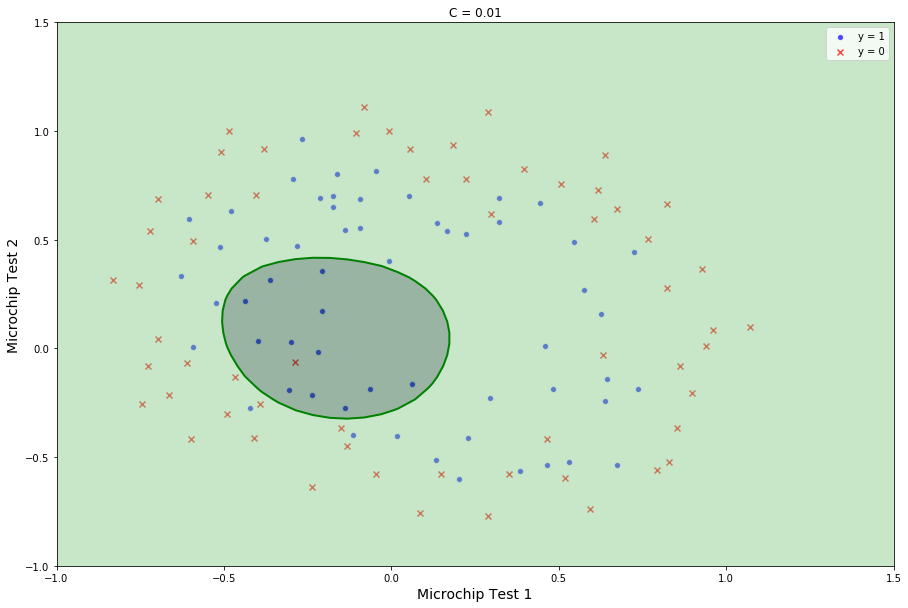

Actual accuracy (with C = 0.01): 60.2%
Expected accuracy (with C = 1): 83.1% (approx)



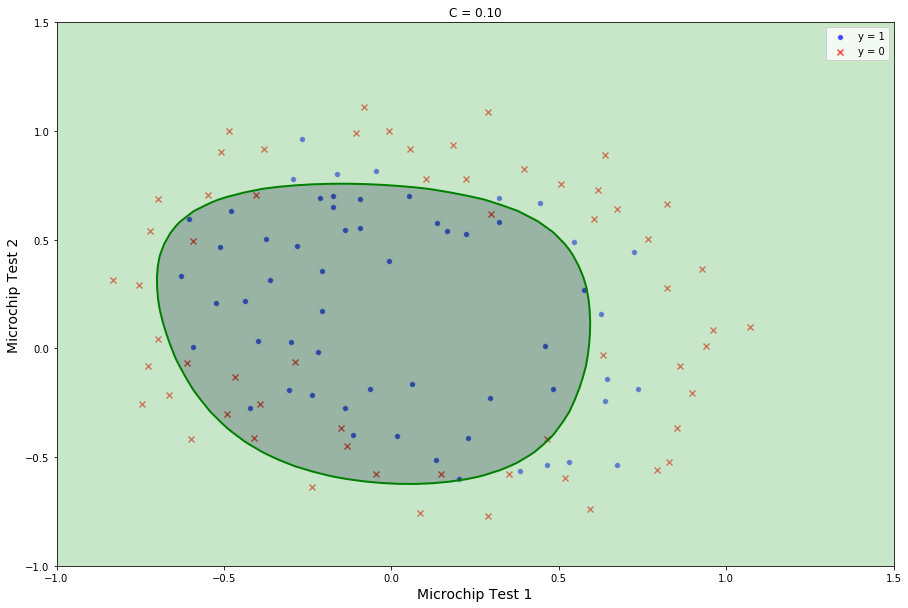

Actual accuracy (with C = 0.1): 74.6%
Expected accuracy (with C = 1): 83.1% (approx)



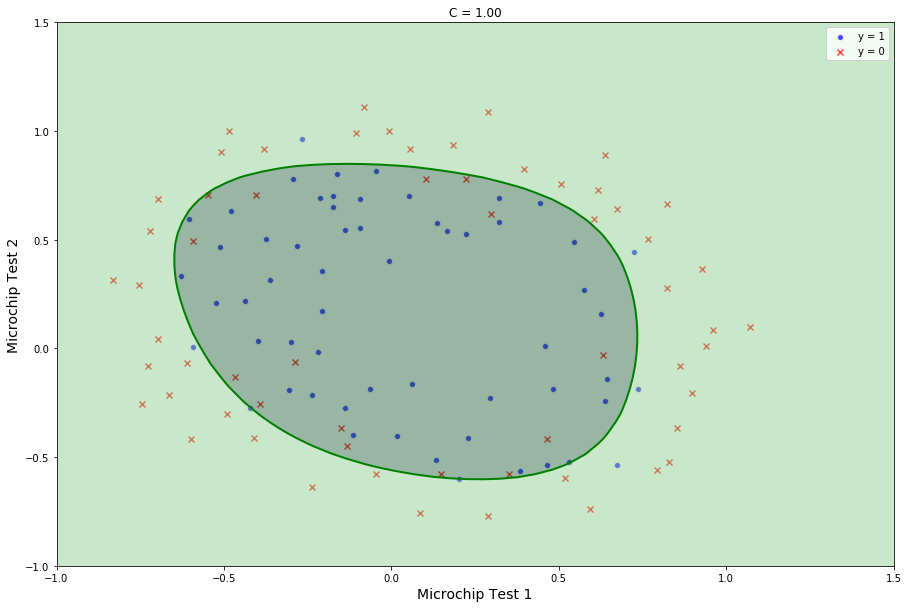

Actual accuracy (with C = 1): 82.2%
Expected accuracy (with C = 1): 83.1% (approx)



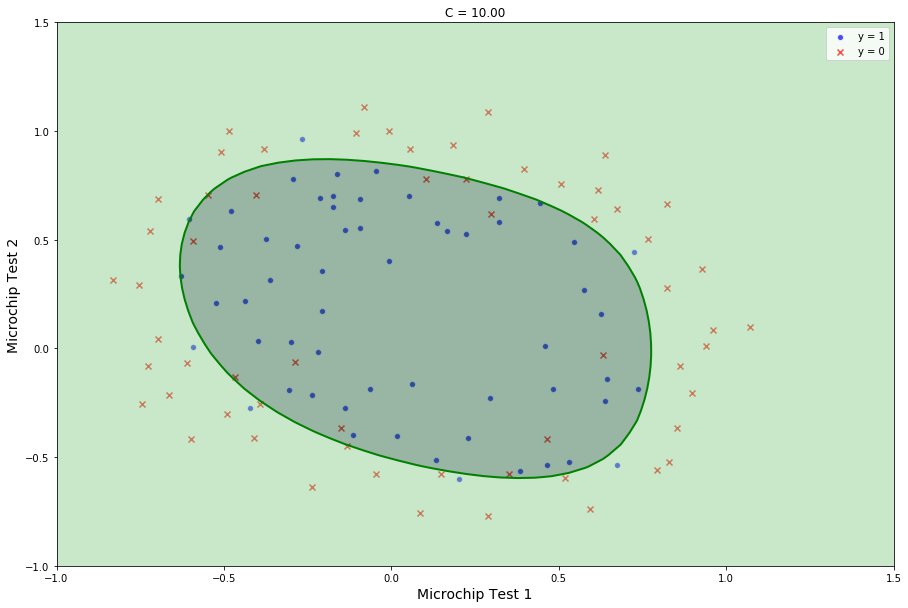

Actual accuracy (with C = 10): 83.9%
Expected accuracy (with C = 1): 83.1% (approx)



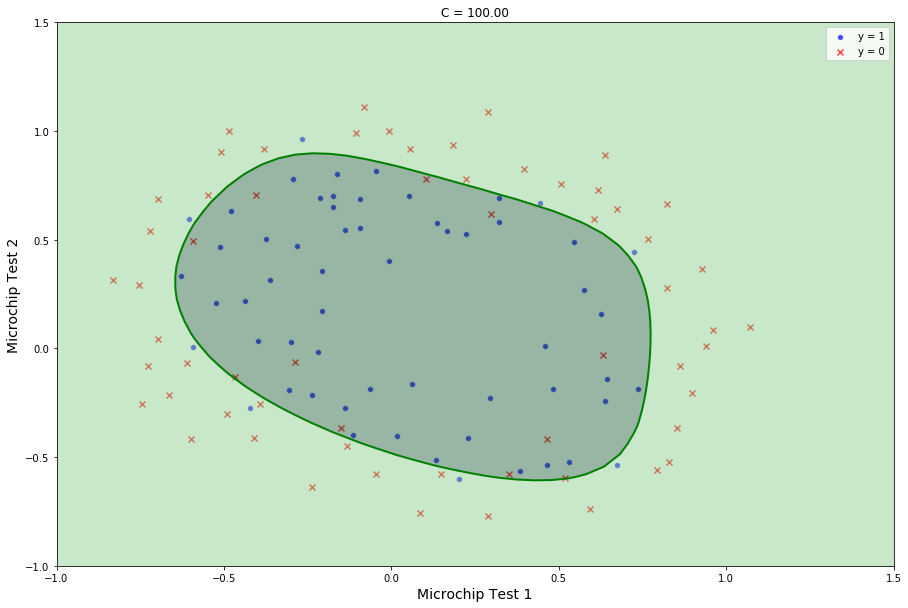

Actual accuracy (with C = 100): 83.9%
Expected accuracy (with C = 1): 83.1% (approx)



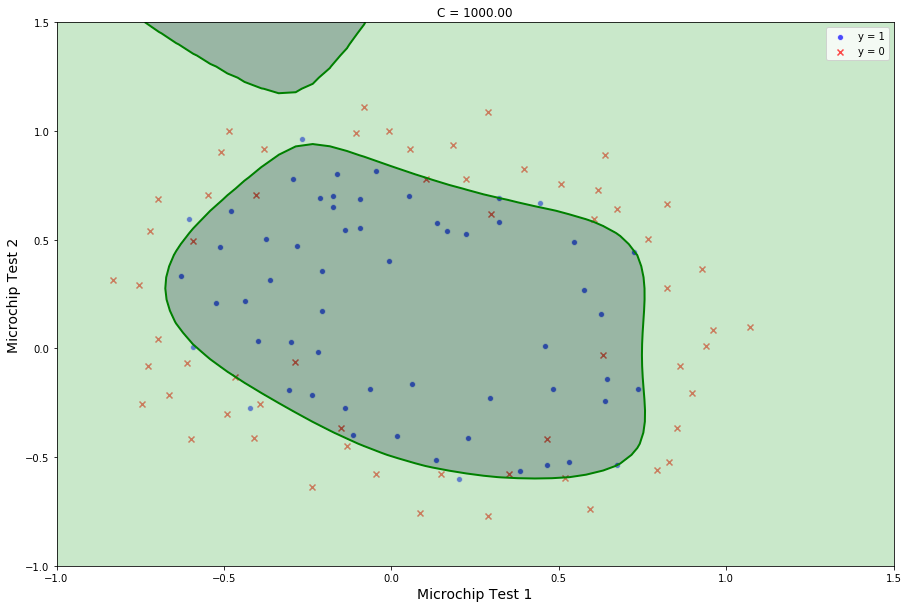

Actual accuracy (with C = 1000): 85.6%
Expected accuracy (with C = 1): 83.1% (approx)



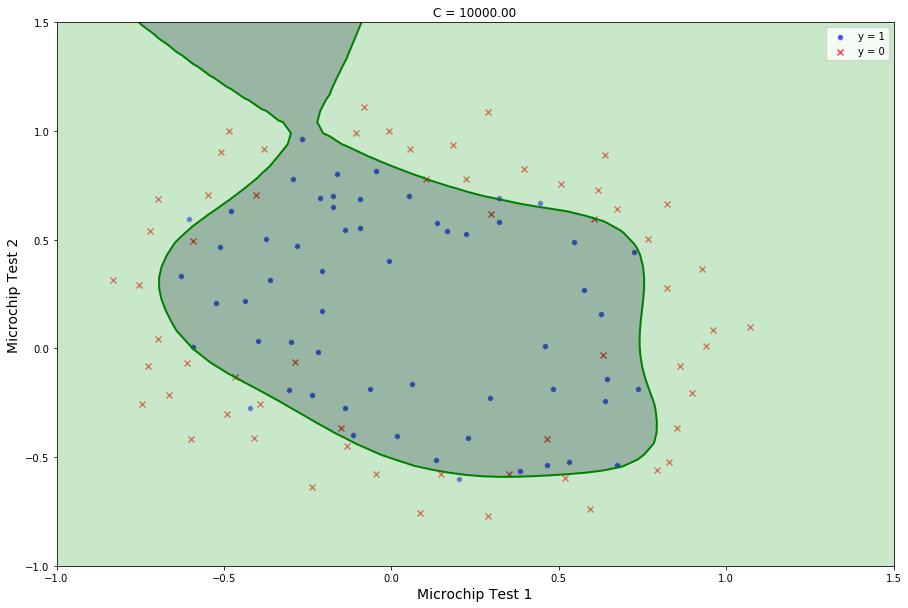

Actual accuracy (with C = 10000): 86.4%
Expected accuracy (with C = 1): 83.1% (approx)



In [76]:
# Set regularization parameters C (the inverse of lambda) - a list of potential values
C_values = [0.01, 0.1, 1, 10, 100, 1000, 10000]

# loop over the list of potential values of C
for C in C_values:
    # instantiate a LogisticRegression object and fit it
    lr = LogisticRegression(C = C, random_state = 1)
    lr.fit(X_bare, y)
    
    # pull out the theta values
    theta3 = np.column_stack([lr.intercept_, lr.coef_])
    theta3T = theta3.T
    
    # plot the decision boundaries
    utils.plotDecisionBoundary(plotData, theta3T, X, y)
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')
    plt.legend(['y = 1', 'y = 0'])
    plt.grid(False)
    plt.title('C = %0.2f' % C)
    plt.show()
    
    # test accuracy
    counter = 0
    p = predict(theta3, X) # note we don't need to transpose the theta vector in this function
    for item in range (len(y)):
        if p[item] == y[item]:
            counter += 1
    print("Actual accuracy (with C = {}): {:.1f}%".format(C, (counter/len(y))*100))
    print('Expected accuracy (with C = 1): 83.1% (approx)\n')

## 3 Conclusions and Potential Next Steps

In this workbook we have:
- Written our own functions to perform "standard" linear regression on a simple 2-dimensional set of data that are obviously linearly separable - including using scipy's `optimize.minimize` module to derive the optimal values of $\theta$.
- Written an object-oriented implementation of the same thing.
- Used `scikitlearn'`s `LogisiticRegression` object to do this, too.
- Learned one way to apply logistic regression to non-linearly-separable data - by projecting the data onto a higher-dimensional space in which the two classes are linearly separable (we did this by creating a set of synthetic data from our initial 2-d data-set, where the higher dimensions represented different combinations of the products of powers of our x- and y-data).
- Learned how we can add a further *regularization* term to help avoid under- and over-fitting of the data.
- Written our own function to implement regularized logistic regression.
- Seen how `scikitlearn`'s implementation can be used to regularize logistic regression (very easily, it turns out!).

For those that are interested, useful next steps might include:
- Using `scikitlearn`'s "test, train split" functionality to perform rather more advanced tests of the predictive capabilities of our logistic regression models.
- Learning about alternative classification models, including:
    - Support vector machines (including so-called "kernelized" SVM models)
    - Stochastic gradient descent classifiers in `scikitlearn` (`SGDClassifier` objects)
    - Decision trees and random forests